In [1]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
from numpy import matlib
import math
import timeit

# %load_ext autoreload
# %autoreload 2

In [2]:
DATA = 1
from autoenc_train import * 
X_train, Y_train = load_data(DATA,10)
X_train_bw = (np.sum(X_train, axis=3)/(3)).reshape([-1,245,437,1])

In [3]:
tf.reset_default_graph()
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 245, 437, 1])
#     Y_ = tf.placeholder(tf.float32, [None, 245, 437, 3])
    Y = tf.placeholder(tf.float32, [None, 245, 437, 1])
is_training = tf.placeholder(tf.bool)
with tf.variable_scope('Loss_Encoder') as enc: 
    latent_y = encoder(X, is_training, DATA)
with tf.variable_scope('Loss_Decoder') as dec:
    output = decoder(latent_y, is_training, DATA)

trans_loss = tf.nn.l2_loss(output-Y)
mean_loss = tf.reduce_mean(trans_loss)
tf.summary.scalar('loss', mean_loss)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
enc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope='Loss_Encoder')
dec_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope='Loss_Decoder')

In [4]:

sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))
enc_saver = tf.train.Saver(var_list=enc_vars)
dec_saver = tf.train.Saver(var_list=dec_vars)
# writer = tf.summary.FileWriter('./tb',sess.graph)
sess.run(tf.global_variables_initializer())
if DATA == 1:
    enc_saver.restore(sess, './loss_network/loss_network_enc')
    dec_saver.restore(sess, './loss_network/loss_network_dec')
if DATA == 0:
    saver.restore(sess, './Models/PT_data_0_epochs_20_batchsize_5_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./loss_network/loss_network_enc
INFO:tensorflow:Restoring parameters from ./loss_network/loss_network_dec


10.7028


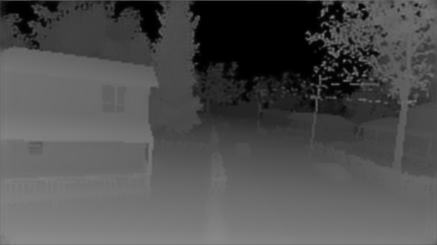

In [5]:
i = 1
IMG , img_loss = sess.run([output, trans_loss], {X: Y_train[i:i+1,...],
                        Y: Y_train[i:i+1,...],
                        is_training: True})

print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG*255.0)))

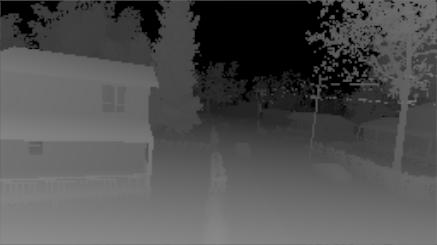

In [17]:
Image.fromarray(np.uint8(np.squeeze(Y_train[i,:,:,:]*255.0)))

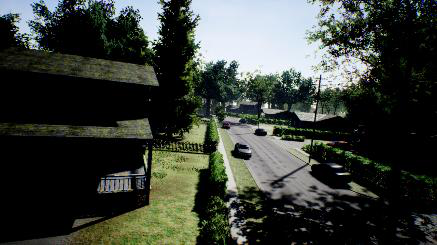

In [41]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))

In [19]:
np.amax(IMG)

0.28083199

In [58]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 245, 437, 1])
w = np.ones([3,3,1,1])*-1
w[1,1,0,0] = 8
w /= 100.0
# w = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])/50.0
# w = w.reshape([3,3,1,1])
W = tf.constant(w, dtype=tf.float32)
edges = tf.nn.conv2d(X, W, strides=[1,1,1,1], padding='SAME')
sess = tf.Session()

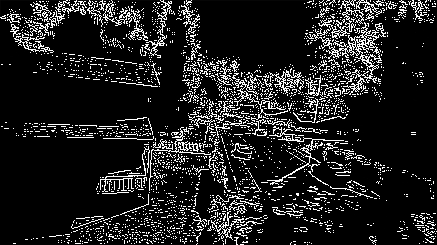

In [59]:
i=1
test = sess.run(edges, {X:X_train_bw[i:i+1,...]})
Image.fromarray(np.uint8(np.squeeze(test*255.0)))

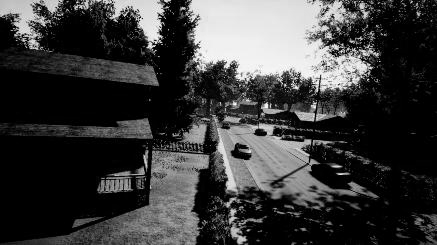

In [45]:
Image.fromarray(np.uint8(np.squeeze(X_train_bw[i,:,:,:]*255.0)))